# Discrete Fourier Transform (DFT) - Complete Analysis

This notebook demonstrates the implementation and application of:
- **DFT (Discrete Fourier Transform)** - Converts time-domain signals to frequency-domain
- **IDFT (Inverse DFT)** - Reconstructs time-domain signals from frequency-domain
- **Magnitude, Phase, and Power Spectrum** analysis

## Import Libraries

In [ ]:
import numpy as np              # For numerical computations
import matplotlib.pyplot as plt  # For plotting graphs

## DFT Function

The **Discrete Fourier Transform (DFT)** converts a discrete-time signal $x[n]$ into its frequency-domain representation $X[m]$.

**DFT Formula:**
$$X[m] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j\frac{2\pi mn}{N}}$$

Where:
- $x[n]$ = Input signal (time-domain)
- $X[m]$ = Output spectrum (frequency-domain)
- $N$ = Number of samples
- $m$ = Frequency index (0 to N-1)

In [ ]:
def dft(x_n, N):
    """
    Compute the Discrete Fourier Transform (DFT) of a signal.
    
    Parameters:
        x_n: Input signal array (time-domain)
        N: Number of DFT points
    
    Returns:
        X_m: Complex array containing frequency-domain coefficients
    """
    X_m = np.zeros(N, dtype=np.complex128)  # Initialize output array with complex zeros
    
    for m in range(N):  # For each frequency bin
        for n in range(N):  # Sum over all time samples
            # Apply DFT formula: X[m] = Σ x[n] * e^(-j*2π*m*n/N)
            X_m[m] += x_n[n] * np.exp(-2j * np.pi * m * n / N)
            
    return X_m

## Phase Calculation Function

Computes the **phase angle** of each frequency component in degrees. The phase represents the angular offset of each sinusoidal component in the signal.

In [ ]:
def phase(X_m, N):
    """
    Calculate the phase angle of DFT coefficients.
    
    Parameters:
        X_m: Complex DFT coefficients
        N: Number of points
    
    Returns:
        X_phase: List of phase angles in degrees
    """
    X_phase = []
    
    for i in X_m:
        # Round real and imaginary parts to avoid floating-point errors
        i = round(i.real) + round(i.imag) * 1j
        # Calculate phase angle in degrees using arctan(imag/real)
        X_phase.append(np.angle(i, deg=True))
    
    return X_phase

## IDFT Function (Inverse Discrete Fourier Transform)

The **IDFT** reconstructs the original time-domain signal from its frequency-domain representation.

**IDFT Formula:**
$$x[n] = \frac{1}{N} \sum_{m=0}^{N-1} X[m] \cdot e^{j\frac{2\pi mn}{N}}$$

Note: The IDFT uses a positive exponent (+j) and includes a normalization factor of $\frac{1}{N}$.

In [ ]:
def idft(X_m, N):
    """
    Compute the Inverse Discrete Fourier Transform (IDFT).
    
    Parameters:
        X_m: Complex DFT coefficients (frequency-domain)
        N: Number of points
    
    Returns:
        x_n: Reconstructed time-domain signal
    """
    x_n = np.zeros(N, dtype=np.complex128)  # Initialize output array
    
    for n in range(N):  # For each time sample
        for m in range(N):  # Sum over all frequency bins
            # Apply IDFT formula: x[n] = (1/N) * Σ X[m] * e^(j*2π*n*m/N)
            x_n[n] += X_m[m] * np.exp(2j * np.pi * n * m / N)
        x_n[n] = x_n[n] / N  # Normalize by N

    return x_n

## DFT Analysis of a Composite Signal

**Test Signal:** $x(t) = \sin(2\pi \cdot 1000 \cdot t) + 0.5\sin(2\pi \cdot 2000 \cdot t + \frac{3\pi}{4})$

This is a composite signal containing:
- A 1 kHz sine wave with amplitude 1
- A 2 kHz sine wave with amplitude 0.5 and phase shift of 135°

**Analysis includes:**
1. Original continuous signal
2. Sampled discrete signal
3. Magnitude spectrum (|X[m]|)
4. Phase spectrum (∠X[m])
5. Power spectrum (|X[m]|²)
6. Reconstructed signal using IDFT

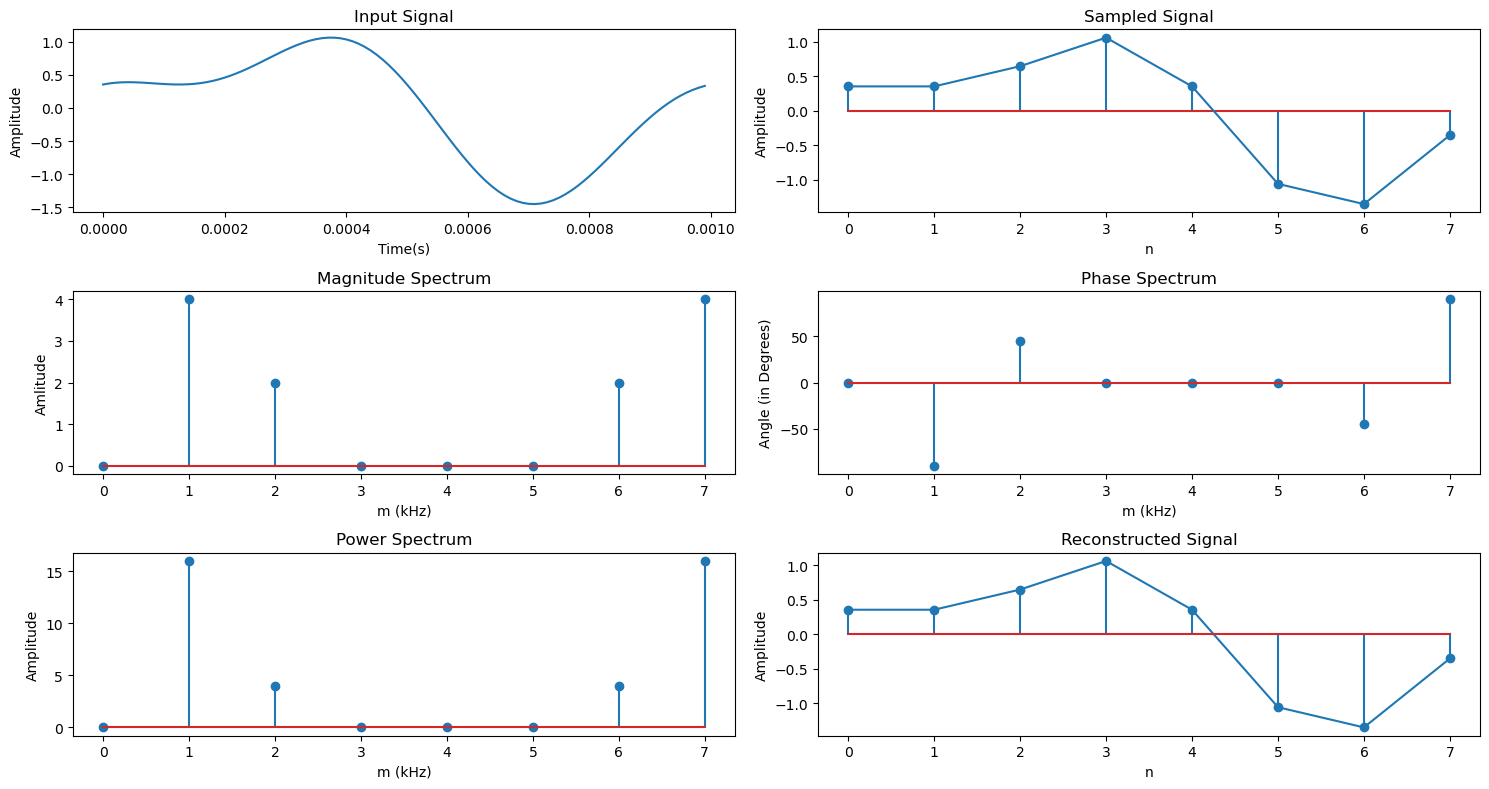

In [ ]:
# ===================== Signal Parameters =====================
N = 8       # Number of DFT points
fs = 8000   # Sampling frequency (Hz)

# ===================== Generate Continuous Signal =====================
t = np.arange(0, 0.001, 0.00001)  # Time vector for continuous signal (0 to 1ms)
# Composite signal: 1kHz sine + 0.5 amplitude 2kHz sine with 135° phase shift
x = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)

plt.figure(figsize=(15, 8))

# Plot 1: Original Continuous Signal
plt.subplot(3, 2, 1)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Input Signal')

# ===================== Sample the Signal =====================
t = np.arange(0, 1, 1/fs)  # Discrete time vector
x_n = np.sin(2 * np.pi * 1000 * t) + 0.5 * np.sin(2 * np.pi * 2000 * t + 3 * np.pi / 4)
x_shifted = x_n[3:N+3]  # Store shifted version for later analysis (samples 3 to N+2)
x_n = x_n[0:N]          # Take first N samples for DFT

# Plot 2: Sampled Discrete Signal
plt.subplot(3, 2, 2)
plt.stem(x_n)
plt.plot(x_n)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')

# ===================== Compute DFT =====================
X_m = dft(x_n, N)

# Plot 3: Magnitude Spectrum
plt.subplot(3, 2, 3)
plt.stem(np.abs(X_m))  # |X[m]| - absolute value of complex coefficients
plt.ylabel('Amlitude')
plt.xlabel('m (kHz)')
plt.title('Magnitude Spectrum')

# Plot 4: Phase Spectrum
X_phase = phase(X_m, N)
plt.subplot(3, 2, 4)
plt.stem(X_phase)
plt.ylabel('Angle (in Degrees)')
plt.xlabel('m (kHz)')
plt.title('Phase Spectrum')

# Plot 5: Power Spectrum
plt.subplot(3, 2, 5)
plt.stem(np.abs(X_m) ** 2)  # |X[m]|² - power at each frequency
plt.ylabel('Amplitude')
plt.xlabel('m (kHz)')
plt.title('Power Spectrum')

# ===================== Reconstruct Signal using IDFT =====================
x_n = idft(X_m, N)

# Plot 6: Reconstructed Signal
plt.subplot(3, 2, 6)
plt.plot(x_n.real)    # Real part of reconstructed signal
plt.stem(x_n.real)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal')

plt.tight_layout()
plt.show()

## Time-Shifting Property of DFT

**Property:** If $x[n] \xrightarrow{DFT} X[m]$, then $x[n-n_0] \xrightarrow{DFT} X[m] \cdot e^{-j\frac{2\pi m n_0}{N}}$

Time shifting in the time domain causes a **linear phase shift** in the frequency domain, while the **magnitude spectrum remains unchanged**.

Below we analyze the shifted signal (starting at sample n=3) to demonstrate this property.

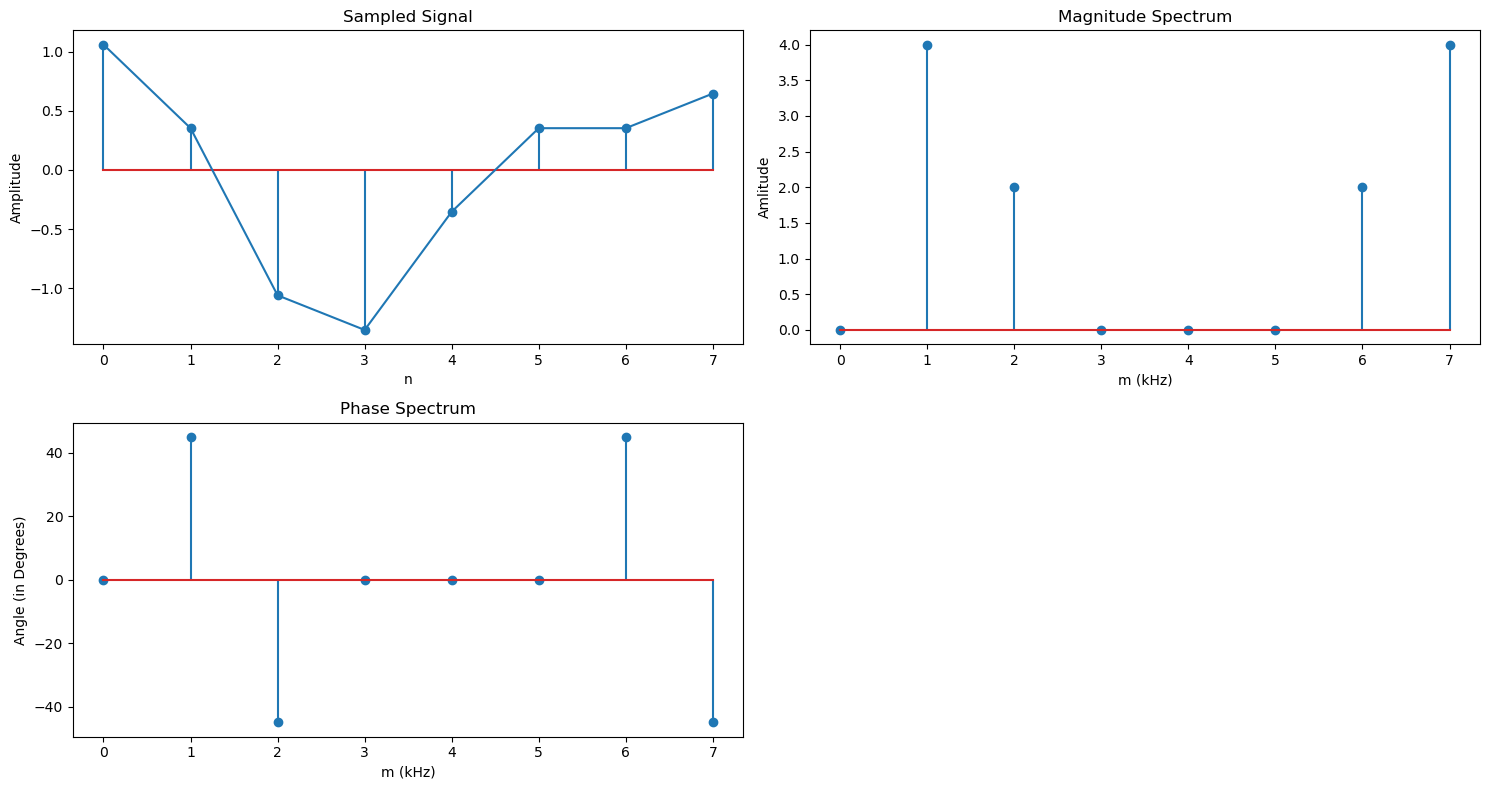

In [ ]:
# ===================== DFT of Time-Shifted Signal =====================
plt.figure(figsize=(15, 8))

# Plot 1: Time-Shifted Sampled Signal (starting from n=3)
plt.subplot(2, 2, 1)
plt.stem(x_shifted)
plt.plot(x_shifted)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Sampled Signal (Shifted by 3 samples)')

# Compute DFT of shifted signal
X_m = dft(x_shifted, N)

# Plot 2: Magnitude Spectrum (should be same as original - magnitude is shift-invariant)
plt.subplot(2, 2, 2)
plt.stem(np.abs(X_m))
plt.ylabel('Amlitude')
plt.xlabel('m (kHz)')
plt.title('Magnitude Spectrum')

# Plot 3: Phase Spectrum (will differ due to time shift)
X_phase = phase(X_m, N)
plt.subplot(2, 2, 3)
plt.stem(X_phase)
plt.ylabel('Angle (in Degrees)')
plt.xlabel('m (kHz)')
plt.title('Phase Spectrum (Changed due to time shift)')

plt.tight_layout()
plt.show()